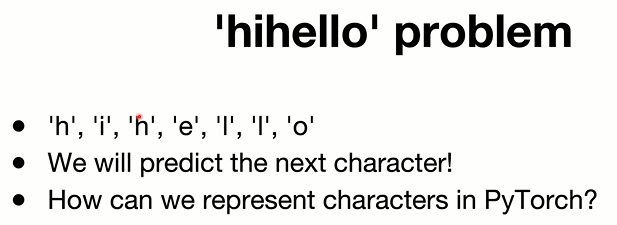

- h가 들어오면 i를 예측하고 i가 들어오면 h를 예측하는 식으로 다음 문자를 예측해보자!

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
torch.manual_seed(0)

In [3]:
char_set = ['h', 'i', 'e', 'l', 'o']

In [4]:
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

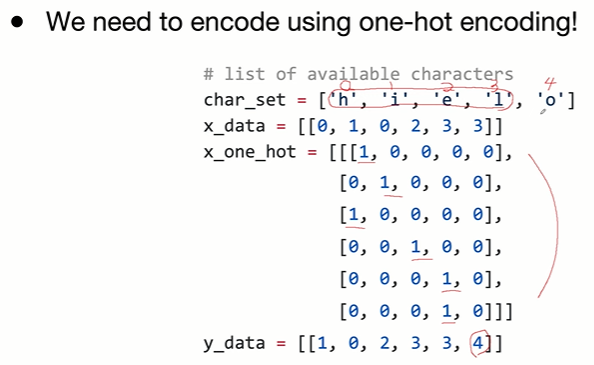

In [5]:
# data setting
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0], # h
              [0, 1, 0, 0, 0], # i
              [1, 0, 0, 0, 0], # h
              [0, 0, 1, 0, 0], # e
              [0, 0, 0, 1, 0], # l
              [0, 0, 0, 1, 0]]] # l -> O가 없는 것은 O전 까지는 input으로, O는 output으로 사용한 것
y_data = [[1, 0, 2, 3, 3, 4]]   # 

In [6]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [7]:
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  

In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

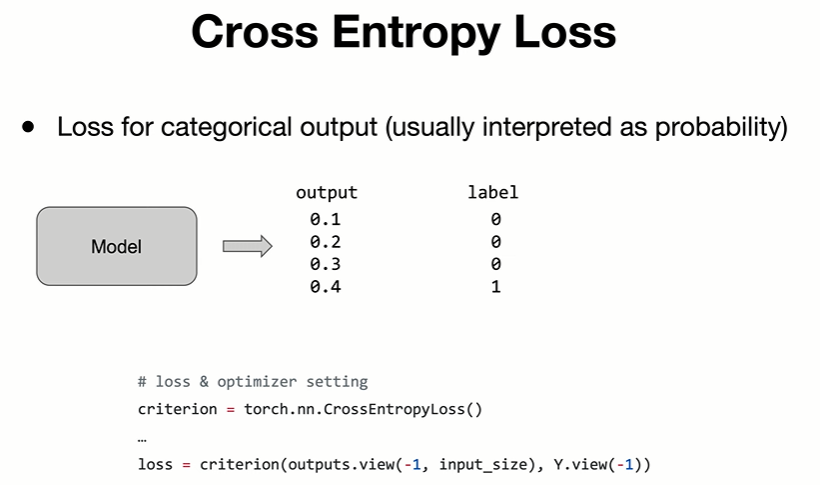

- CrossEntropyLoss는 분류 문제를 해결하는 경우 많이 사용
- loss를 정의할 때는 (output값, 정답값) 순서대로 써주어야 함! 

In [9]:
for i in range(100):
    optimizer.zero_grad() # 반드시 토치에서 가장 먼저 해야하는 코드
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.7802648544311523 prediction:  [[1 1 1 1 1 1]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  iiiiii
1 loss:  1.4931954145431519 prediction:  [[1 4 1 1 4 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ioiioo
2 loss:  1.3337129354476929 prediction:  [[1 3 2 3 1 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ilelio
3 loss:  1.215295433998108 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelll
4 loss:  1.1131411790847778 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelll
5 loss:  1.0241888761520386 prediction:  [[2 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elello
6 loss:  0.9573155045509338 prediction:  [[2 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elello
7 loss:  0.9102011322975159 prediction:  [[2 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ehello
8 loss:  0.8731772899627686 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
9 